<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Primer</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://www.contribute.geeksforgeeks.org/wp-content/uploads/numpy-logo1.jpg" alt="NumPy Logo" style="height: 250px;"></div>


## Overview:

* **Teaching:** 15 minutes
* **Exercises:** 15 minutes

### Questions
1. What are arrays?
2. How can arrays be manipulated effectively in Python?
3. How do we work with unit information with MetPy?

### Objectives
1. Slice and index the array
2. Perform a meteorological calculation on an array of data using MetPy.
3. Use advanced methods to index into arrays

### Resources
- [MetPy Documentation](https://unidata.github.io/MetPy/)
- [MetPy Calculation List](https://unidata.github.io/MetPy/api/generated/metpy.calc.html)
- [MetPy Constants](https://unidata.github.io/MetPy/api/generated/metpy.constants.html)

## 1. Index and slice arrays

Indexing is how we pull individual data items out of an array. Slicing extends this process to pulling out a regular set of the items.

In [1]:
# Convention for import to get shortened namespace
import numpy as np

In [2]:
# Create an array for testing
a = np.arange(12).reshape(3, 4)

In [3]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Indexing in Python is 0-based, so the command below looks for the 2nd item along the first dimension (row) and the 3rd along the second dimension (column).

In [4]:
a[1, 2]

6

Can also just index on one dimension

In [5]:
a[2]

array([ 8,  9, 10, 11])

Negative indices are also allowed, which permit indexing relative to the end of the array.

In [6]:
a[0, -1]

3

Slicing syntax is written as `start:stop[:step]`, where all numbers are optional.
- defaults: 
  - start = 0
  - end = len(dim)
  - step = 1
- The second colon is also optional if no step is used.

It should be noted that end represents one past the last item; one can also think of it as a half open interval: `[start, end)`

In [7]:
# Get the 2nd and 3rd rows
a[1:3]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
# All rows and 3rd column
a[:, 2]

array([ 2,  6, 10])

In [9]:
# ... can be used to replace one or more full slices
a[..., 2]

array([ 2,  6, 10])

In [10]:
# Slice every other row
a[::2]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [11]:
# Slice out every other column
a[:, ::2]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [12]:
# Slice every other item along each dimension -- how would we do this


## 2. Use units from MetPy with calculations

In [13]:
# Import MetPy's units registry
from metpy.units import units

In [14]:
length = 8 * units.feet
print(length * length)

64 foot ** 2


In [15]:
distance = 10 * units.mile
time = 15 * units.minute
avg_speed = distance / time
print(avg_speed)
print(avg_speed.to_base_units())
print(avg_speed.to('mph'))

0.6666666666666666 mile / minute
17.8816 meter / second
40.0 mph


## 3. Perform meteorological calculations using MetPy

In [16]:
np.random.seed(19990503)  # So we all have the same data
u = np.random.randint(0, 45, 10) * units('m/s')
v = np.random.randint(0, 45, 10) * units('m/s')

In [17]:
print(u)
print(v)

[ 14.   2.  44.  37.  35.  37.   8.  25.  22.  10.] meter / second
[ 23.  27.   5.   0.  38.  23.  27.   8.   8.  40.] meter / second


In [18]:
import metpy.calc as mpcalc

speed = mpcalc.get_wind_speed(u, v)
direction = mpcalc.get_wind_dir(u, v)

In [19]:
print(speed)
print(np.rad2deg(direction))

[ 26.92582404  27.07397274  44.28317965  37.          51.66236541  43.56604182  28.16025568  26.2488095   23.40939982  41.23105626] meter / second
[ 211.32869287  184.2363948   263.51692631  270.          222.64670313  238.13402231  196.50436138  252.25532837  250.01689348  194.03624347] degree


In [20]:
print(np.mean(speed))

34.95609049170319 meter / second


In [21]:
print(np.mean(np.rad2deg(direction)))
print(np.std(np.rad2deg(direction)))

228.2675566116978 degree
29.27089778050201 degree


Let's use MetPy to calculate the dewpoint from the current temperature and relative humidity:

In [22]:
import metpy.calc as mpcalc
mpcalc.dewpoint_rh(25 * units.degC, 0.75)

<Quantity(20.264799097790046, 'degC')>

Thanks to units, this can work with Fahrenheit as well:

In [23]:
td = mpcalc.dewpoint_rh(77 * units.degF, 0.75)
td

<Quantity(20.26479888333684, 'degC')>

And you can get it back in Fahrenheit as:

In [24]:
td.to('degF')

<Quantity(68.47663839000624, 'degF')>

MetPy also has a library of useful constants, similar to those in `scipy.constants`, that are important for meteorology and have appropriate dimensionality included:

In [25]:
import metpy.constants as consts

We can look at the docstring for the module (or go to the web documentation) to see a list of the available contants:

In [26]:
consts?

So for the density of liquid water (nominally at 0C), we can use:

In [27]:
consts.density_water

<Quantity(1000.0, 'kilogram / meter ** 3')>

Or for a more symbolic and shorter notation, you can also use:

In [28]:
consts.rho_l

<Quantity(1000.0, 'kilogram / meter ** 3')>

### Exercise #1

## 4. Advanced NumPy Indexing
### Boolean indexing
Numpy can easily create arrays of boolean values and use those to select certain values to extract from an array

In [29]:
# Create some synthetic data representing temperature and wind speed data
np.random.seed(19990503)  # Make sure we all have the same data
temp = (20 * np.cos(np.linspace(0, 2 * np.pi, 100)) +
        50 + 2 * np.random.randn(100)) * units.degC
spd = (np.abs(10 * np.sin(np.linspace(0, 2 * np.pi, 100)) +
              10 + 5 * np.random.randn(100))) * units('m/s')

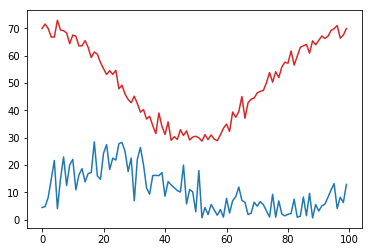

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temp.m, 'tab:red')
plt.plot(spd.m, 'tab:blue');

By doing a comparision between a NumPy array and a value, we get an
array of values representing the results of the comparison between
each element and the value

In [31]:
temp > 45 * units.degC

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

We can take the resulting array and use this to index into the
NumPy array and retrieve the values where the result was true

In [32]:
print(temp[temp > 45 * units.degC])

[ 69.89825854  71.52313905  69.90028363  66.73828667  66.77980233  72.91468564  69.34603239  69.09533591  68.27350814  64.33916721  67.49497791  67.05282372  63.51829518  63.54034678  65.46576463  62.99683836  59.27662304  61.29361272  60.51641586  57.46048995  55.19793004  53.07572989  54.47998158  53.09552107  54.59037269  47.84272747  49.1435589   45.87151534  45.11976794  45.009292  46.36021141  46.87557425  47.25668992  50.09599544  53.77789358  50.24073197  54.07629059  51.95065202  55.84827794  57.56967086  57.19572063  61.67658285  56.51474577  59.72166924  62.99403256  63.57569453  64.05984232  60.88258643  65.37759899  63.94115754  65.53070256  67.15175649  66.26468701  67.03811793  69.17773618  69.83571708  70.99586742  66.34971928  67.49905207  69.83593609] degC


So long as the size of the boolean array matches the data, the boolean array can come from anywhere

In [33]:
print(temp[spd > 10 * units('m/s')])

[ 66.73828667  66.77980233  69.34603239  69.09533591  68.27350814  64.33916721  67.49497791  67.05282372  63.51829518  63.54034678  65.46576463  62.99683836  59.27662304  61.29361272  60.51641586  57.46048995  55.19793004  53.07572989  54.47998158  53.09552107  54.59037269  47.84272747  49.1435589   45.87151534  43.95971516  42.72814762  42.45316175  39.2797517   40.23351938  36.77179678  34.43329229  31.42277612  38.97505745  34.10549575  35.70826448  29.01276068  30.31180935  29.31602671  32.84580454  30.76695309  29.11344716  30.16652571  29.91513049  39.51784389  69.17773618  69.83571708  69.83593609] degC


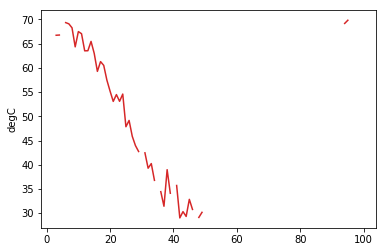

In [34]:
# Make a copy so we don't modify the original data
temp2 = temp.copy()

# Replace all places where spd is <10 with NaN (not a number) so matplotlib skips it
temp2[spd < 10 * units('m/s')] = np.nan * units.degC
plt.plot(temp2, 'tab:red')

Can also combine multiple boolean arrays using the syntax for bitwise operations. **MUST HAVE PARENTHESES** due to operator precedence.

In [35]:
print(temp[(temp < 45 * units.degC) & (spd > 10 * units('m/s'))])

[ 43.95971516  42.72814762  42.45316175  39.2797517   40.23351938  36.77179678  34.43329229  31.42277612  38.97505745  34.10549575  35.70826448  29.01276068  30.31180935  29.31602671  32.84580454  30.76695309  29.11344716  30.16652571  29.91513049  39.51784389] degC


### Arrays of indices

You can also use a list or array of indices to extract particular values--this is a natural extension of the regular indexing. For instance, just as we can select the first element:

In [36]:
print(temp[0])

69.89825854468695 degC


We can also extract the first, fifth, and tenth elements:

In [37]:
print(temp[[0, 4, 9]])

[ 69.89825854  66.77980233  64.33916721] degC


One of the ways this comes into play is trying to sort numpy arrays using `argsort`. This function returns the indices of the array that give the items in sorted order. So for our temp "data":

In [38]:
inds = np.argsort(temp)
print(inds)

[52 57 42 48 54 44 56 51 49 43 50 46 58 55 53 40 37 61 47 45 59 39 36 60 41
 34 66 63 35 38 32 62 64 33 31 67 29 28 68 69 65 30 27 70 71 72 25 26 73 75
 77 21 23 74 76 22 24 20 78 82 80 19 79 16 83 18 87 17 81 84 15 12 13 85 89
 86  9 88 14 90 92 97  3  4 93 11 91 10 98  8  7 94  6 95 99  0  2 96  1  5]


We can use this array of indices to pass into temp to get it in sorted order:

In [39]:
print(temp[inds])

[ 28.71828204  28.85269149  29.01276068  29.11344716  29.25186164  29.31602671  29.42796381  29.91513049  30.16652571  30.31180935  30.48608715  30.76695309  30.93380275  30.95814392  31.07199963  31.1341411   31.42277612  32.27369636  32.44927684  32.84580454  33.37573713  34.10549575  34.43329229  34.95696914  35.70826448  36.77179678  37.06954335  37.39853293  37.7453367   38.97505745  39.2797517   39.34620461  39.51784389  40.23351938  42.45316175  42.69583703  42.72814762  43.95971516  44.03576453  44.45775806  45.009292    45.11976794  45.87151534  46.36021141  46.87557425  47.25668992  47.84272747  49.1435589   50.09599544  50.24073197  51.95065202  53.07572989  53.09552107  53.77789358  54.07629059  54.47998158  54.59037269  55.19793004  55.84827794  56.51474577  57.19572063  57.46048995  57.56967086  59.27662304  59.72166924  60.51641586  60.88258643  61.29361272  61.67658285  62.99403256  62.99683836  63.51829518  63.54034678  63.57569453  63.94115754  64.05984232  64.3391672

Or we can slice `inds` to only give the 10 highest temperatures:

In [40]:
ten_highest = inds[-10:]
print(temp[ten_highest])

[ 69.09533591  69.17773618  69.34603239  69.83571708  69.83593609  69.89825854  69.90028363  70.99586742  71.52313905  72.91468564] degC


There are other numpy arg functions that return indices for operating:

In [41]:
np.*arg*?

### Exercise #2